In [651]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

In [652]:
df = pd.read_csv('D:/Загрузки/data_train.csv', index_col ='Unnamed: 0' )
df.head(10)

,Марка,Модель,Год выпуска,Рабочий объем,Мощность двигателя,Тип топлива,Трансмиссия,Количество мест,Количество дверей,Пробег,Цена
0,audi,a8,2000,3328.0,166.0,дизель,авто,5.0,4.0,352640.00,101800
1,nissan,juke,2013,NaN,81.0,дизель,ручной,NaN,4.0,63460.00,250200
2,skoda,fabia,2014,1199.0,55.0,NaN,ручной,5.0,5.0,15865.00,201700
3,audi,a3,2013,1968.0,110.0,NaN,ручной,NaN,4.0,44606.30,491300
4,bmw,NaN,1999,2793.0,142.0,бензин,ручной,5.0,4.0,187150.00,56100
5,ford,c-max,2015,998.0,92.0,NaN,ручной,5.0,5.0,14487.50,292900
6,audi,a1,2012,1390.0,136.0,NaN,авто,4.0,2.0,23940.00,275100
7,skoda,octavia,2014,NaN,162.0,NaN,авто,NaN,NaN,28500.00,440500
8,seat,alhambra,2014,1968.0,103.0,дизель,ручной,5.0,4.0,27366.65,405800
9,bmw,NaN,2005,2171.0,125.0,бензин,ручной,5.0,4.0,179075.00,120600


In [653]:
df.describe()

,Год выпуска,Рабочий объем,Мощность двигателя,Количество мест,Количество дверей,Пробег,Цена
count,146012.000000,133953.000000,146012.000000,122633.000000,135322.000000,146012.000000,1.460120e+05
mean,2008.726824,1900.935754,101.656179,4.861660,3.983846,87033.925524,2.617951e+05
std,25.998616,985.233202,50.264525,0.865884,0.961134,75049.601767,5.513408e+05
min,0.000000,15.000000,10.000000,1.000000,1.000000,0.000000,3.200000e+03
25%,2006.000000,1400.000000,70.000000,5.000000,4.000000,21280.000000,9.580000e+04
50%,2011.000000,1798.000000,90.000000,5.000000,4.000000,75525.000000,1.975000e+05
75%,2014.000000,1998.000000,120.000000,5.000000,5.000000,134900.000000,3.357000e+05
max,2016.000000,32000.000000,766.000000,23.000000,54.000000,853100.000000,1.293750e+08


Разбираемся с данными

In [654]:
a = df['Марка'].unique()
a

array(['audi', 'nissan', 'skoda', 'bmw', 'ford', 'seat', 'dodge',
       'mitsubishi', 'fiat', 'mercedes-benz', 'opel', 'volkswagen',
       'chevrolet', 'porsche', 'mini', 'jaguar', 'citroen', 'hyundai',
       'toyota', 'smart', 'honda', 'peugeot', 'suzuki', 'kia', 'mazda',
       'volvo', 'renault', 'lancia', 'rover', 'jeep', 'lexus', 'maserati',
       'chrysler', 'alfa-romeo', 'hummer', 'subaru', 'isuzu',
       'lamborghini', 'bentley', 'infinity', 'tesla', 'lotus'],
      dtype=object)

In [655]:
df['Количество мест'].value_counts()

5.0     95076
4.0     14898
7.0      5108
2.0      4350
3.0      1589
6.0       732
9.0       575
8.0       291
1.0         7
17.0        2
10.0        2
23.0        1
12.0        1
14.0        1
Name: Количество мест, dtype: int64

In [656]:
df['Тип топлива'].value_counts()

дизель    28126
бензин    27634
Name: Тип топлива, dtype: int64

In [657]:
df['Количество дверей'].value_counts()

4.0     68018
5.0     41629
2.0     18350
3.0      7266
6.0        55
1.0         3
54.0        1
Name: Количество дверей, dtype: int64

In [658]:
df['Год выпуска'].value_counts()

2015    26045
2012    13694
2011    11729
2014    11210
2013     8940
2010     8070
2009     7106
2008     7080
2007     7013
2006     6422
2016     5995
2005     5563
2004     4765
2003     4016
2002     3619
2001     3203
2000     2662
1999     2370
1998     1661
1997     1091
1996      804
1995      507
1994      376
1993      262
1992      244
1991      223
1990      139
1989       92
1988       92
1987       75
1983       55
1986       54
1984       51
1985       45
1979       37
1980       36
1982       35
1965       32
1973       32
1968       29
1970       29
1966       28
1972       28
1971       27
1974       24
1967       23
1977       22
1978       21
1981       21
1964       21
1959       15
1969       15
1976       14
1962       13
1963       11
1975       11
1958        9
1960        7
1598        7
1955        7
1956        7
1957        7
1910        5
1900        4
1896        4
1000        4
1390        4
1930        4
1929        3
1934        3
1926        3
1798  

In [659]:
df = df.loc[df['Год выпуска'] > 1963]

In [660]:
df['Год выпуска'].value_counts()

2015    26045
2012    13694
2011    11729
2014    11210
2013     8940
2010     8070
2009     7106
2008     7080
2007     7013
2006     6422
2016     5995
2005     5563
2004     4765
2003     4016
2002     3619
2001     3203
2000     2662
1999     2370
1998     1661
1997     1091
1996      804
1995      507
1994      376
1993      262
1992      244
1991      223
1990      139
1989       92
1988       92
1987       75
1983       55
1986       54
1984       51
1985       45
1979       37
1980       36
1982       35
1965       32
1973       32
1968       29
1970       29
1966       28
1972       28
1971       27
1974       24
1967       23
1977       22
1964       21
1978       21
1981       21
1969       15
1976       14
1975       11
Name: Год выпуска, dtype: int64

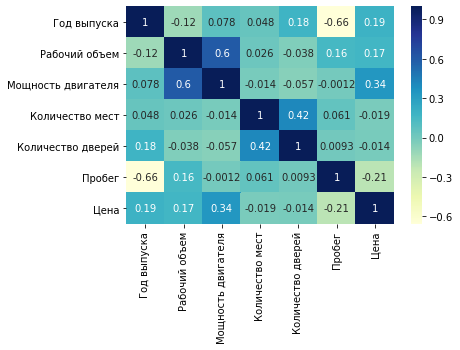

In [661]:
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

In [662]:
z = pd.DataFrame(df.groupby('Марка').mean()['Цена'])
z


,Цена
Марка,
alfa-romeo,1.240040e+05
audi,3.687315e+05
bentley,1.731789e+06
bmw,3.459575e+05
chevrolet,1.583443e+05
chrysler,4.885214e+05
citroen,1.590633e+05
dodge,3.476928e+05
fiat,1.536607e+05


In [663]:
#средние цели по моделям
pd.options.display.max_rows = 683
a = df.groupby(['Модель']).mean()['Цена']
print(a.shape)
a = pd.DataFrame(a)
a

(669,)


,Цена
Модель,
100,1.321895e+05
100-nx,3.320000e+04
1007,6.702174e+04
106,2.318246e+04
107,8.454184e+04
108,1.715278e+05
115,1.887857e+05
116,1.764571e+05
121,2.865000e+04


In [664]:
mod = a.index

In [665]:
a.loc[a['Цена'] > 2317569, 'Цена'] =  8
a.loc[(a['Цена'] >1985500) ]= 7
a.loc[(a['Цена'] >1034196)]= 6
a.loc[(a['Цена'] >718103)]= 5
a.loc[(a['Цена'] >504229)]= 4
a.loc[(a['Цена'] >200172)]= 3
a.loc[(a['Цена'] >100050)]= 2
a.loc[(a['Цена'] >8)]= 1


a

,Цена
Модель,
100,2.0
100-nx,1.0
1007,1.0
106,1.0
107,1.0
108,2.0
115,2.0
116,2.0
121,1.0


In [666]:
df = df.dropna()

def clas (val):
    if val in mod:    
        return a.loc[str(val)]
    else:
        return 2




df['Модель']= df['Модель'].apply(clas)
df


,Марка,Модель,Год выпуска,Рабочий объем,Мощность двигателя,Тип топлива,Трансмиссия,Количество мест,Количество дверей,Пробег,Цена
0,audi,4.0,2000,3328.0,166.0,дизель,авто,5.0,4.0,352640.00,101800
8,seat,3.0,2014,1968.0,103.0,дизель,ручной,5.0,4.0,27366.65,405800
11,mitsubishi,1.0,1999,1299.0,63.0,бензин,ручной,5.0,4.0,137750.00,10200
12,audi,1.0,2002,1390.0,55.0,бензин,ручной,4.0,4.0,126350.00,69000
16,ford,2.0,2015,998.0,59.0,бензин,ручной,5.0,4.0,475.00,211400
32,mini,3.0,2004,1598.0,66.0,бензин,ручной,4.0,2.0,88635.00,86100
42,ford,2.0,2001,2495.0,125.0,бензин,ручной,5.0,4.0,187625.00,20700
43,hyundai,2.0,2011,1591.0,93.0,бензин,ручной,5.0,4.0,85132.35,112000
55,mercedes-benz,1.0,1998,1397.0,60.0,бензин,ручной,5.0,4.0,157225.00,23100
60,bmw,3.0,2011,1995.0,130.0,дизель,авто,5.0,4.0,131290.00,246200


In [667]:
def change_values(val):
    
    
    
    
    if val in ['renault', 'suzuki', 'lancia', 'smart', 'alfa-romeo', 'hyundai',
               'seat', 'ford', 'honda', 'mazda', 'mitsubishi', 'toyota', 'skoda', 
               'chevrolet', 'opel', 'citroen', 'fiat', 'peugeot']:
        return 1
    if val in ['volvo', 'mini', 'volkswagen', 'nissan', 'kia', 'subaru']:

        return 2
    if val in ['mercedes-benz', 'jeep', 'audi', 'dodge', 'isuzu', 'bmw']:

        return 3
    if val in ['lotus', 'infinity', 'rover', 'jaguar', 'chrysler', 'hummer', 'aston-martin']:

        return 4
    if val in ['bentley', 'tesla', 'porsche', 'lexus', 'maserati']:

        return 5
    else:
        return 6

In [668]:
import random
def change_valuess(val):
    
    
    if val == 'дизель':
        return 1
    if val == 'бензин':

        return 2

    else:
        return random.randint(1,2)
    
import random
def transmisson(val):
    
    
    if val == 'ручной':
        return 1
    if val == 'авто':

        return 2

    else:
        return random.randint(1,2)

In [669]:
def old(val):
    return 2017 - val

In [670]:
#классифицируем модель по классам, в зависимости от средней цены машины внутри марки
#заполняем пропуски средним
#df = pd.get_dummies(df)
df['Год выпуска'] = df['Год выпуска'].apply(old)
df['Трансмиссия'] = df['Трансмиссия'].apply(transmisson)
df['Тип топлива'] = df['Тип топлива'].apply(change_valuess)
df['Марка'] = df['Марка'].apply(change_values)

df = df.fillna(df.mean())
df.head()


,Марка,Модель,Год выпуска,Рабочий объем,Мощность двигателя,Тип топлива,Трансмиссия,Количество мест,Количество дверей,Пробег,Цена
0,3,4.0,17,3328.0,166.0,1,2,5.0,4.0,352640.00,101800
8,1,3.0,3,1968.0,103.0,1,1,5.0,4.0,27366.65,405800
11,1,1.0,18,1299.0,63.0,2,1,5.0,4.0,137750.00,10200
12,3,1.0,15,1390.0,55.0,2,1,4.0,4.0,126350.00,69000
16,1,2.0,2,998.0,59.0,2,1,5.0,4.0,475.00,211400


In [671]:
#Убираем цену из датафрефма и записываем в y
#df = df.head(5000) #обреззаю датафрейм для того чтобы прошел по памяти
y = df['Цена']
X = df.drop('Цена', axis =1)
X.head()

X.shape

(28597, 10)

In [672]:
from sklearn.ensemble import RandomForestClassifier 
#я пыталась, но памяти не хватило
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [673]:
car = RandomForestClassifier()
car.fit(train_X, train_y)
y_pred = car.predict(test_X)
t = r2_score(test_y, y_pred)
t

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MemoryError: could not allocate 564920320 bytes

In [674]:
train_X, test_X, train_y, test_y = train_test_split(X, y)
car = DecisionTreeRegressor()
#делаем дерево

In [639]:
#читим с GridSearchCV (подбирает наилучшие параметры, глубина, количество листьев), нужно подождать..
#сразу обучаем и смотрим score
params = {'min_samples_split' :[i for i in range(20, 160, 20)],'min_samples_leaf' :[i for i in range(5, 30 , 5)]}

car_best = GridSearchCV(car, params, cv=10, scoring='r2', n_jobs=-1)
car_best.fit(train_X, train_y)
y_pred = car_best.predict(test_X)
t = r2_score(test_y, y_pred)
t


0.852335105750293

In [676]:
#смотрим лучшие парметры

print(car_best.best_params_)

{'min_samples_leaf': 10, 'min_samples_split': 20}


In [677]:
#создаем дерево с наилучшими параметрами и по скору смотрим, чтобы он совпал с предыдущим
car = DecisionTreeRegressor(min_samples_leaf = 10, min_samples_split = 20)
car.fit(train_X, train_y)
y_pred = car.predict(test_X)
t = r2_score(test_y, y_pred)
t


0.8579156742638825

In [600]:
car = LinearRegression()
car.fit(train_X, train_y)
y_pred = car.predict(test_X)
t = r2_score(test_y, y_pred)
t
#если вдруг захочется лин регресии

0.741471742871119

In [376]:
#car = RidgeCV(cv = 10 )
#car.fit(train_X, train_y)
#y_pred = car.predict(test_X)
#t = r2_score(test_y, y_pred)
#t
#или Ridge

## Работа с тестовыми данными

In [678]:
c = pd.read_csv('D:/Загрузки/data_test.csv')
Id = c['Unnamed: 0'] #эта колонка нужна для предсказний 
c.drop('Модель', axis = 1)
c.head()



,Unnamed: 0,Марка,Модель,Год выпуска,Рабочий объем,Мощность двигателя,Тип топлива,Трансмиссия,Количество мест,Количество дверей,Пробег
0,146012,opel,astra,1999,1796.0,85.0,бензин,ручной,5.0,4.0,191900.00
1,146013,bmw,NaN,1979,3188.0,147.0,бензин,ручной,4.0,2.0,67071.90
2,146014,peugeot,307,2006,1587.0,80.0,NaN,авто,5.0,5.0,162450.00
3,146015,opel,corsa,2015,1398.0,66.0,NaN,ручной,5.0,5.0,27721.95
4,146016,skoda,octavia,2015,1798.0,10.0,бензин,ручной,5.0,NaN,9.50


In [679]:
c = pd.read_csv('D:/Загрузки/data_test.csv', index_col = 'Unnamed: 0')
print(c.shape)
c.head()


(74016, 10)


,Марка,Модель,Год выпуска,Рабочий объем,Мощность двигателя,Тип топлива,Трансмиссия,Количество мест,Количество дверей,Пробег
146012,opel,astra,1999,1796.0,85.0,бензин,ручной,5.0,4.0,191900.00
146013,bmw,NaN,1979,3188.0,147.0,бензин,ручной,4.0,2.0,67071.90
146014,peugeot,307,2006,1587.0,80.0,NaN,авто,5.0,5.0,162450.00
146015,opel,corsa,2015,1398.0,66.0,NaN,ручной,5.0,5.0,27721.95
146016,skoda,octavia,2015,1798.0,10.0,бензин,ручной,5.0,NaN,9.50


In [681]:
def change_valuesss(val):
    
    """ для годов меньше 1950 поменяем на среднее значение года"""
    
    
    if int(val) < 1950:
        return c['Год выпуска'].mean()
    else:
        return val


In [682]:
c['Год выпуска'] = c['Год выпуска'].apply(change_valuesss)


In [683]:
c['Год выпуска'] = c['Год выпуска'].apply(old)




In [684]:
c['Трансмиссия'] = c['Трансмиссия'].apply(transmisson)

In [685]:
c['Тип топлива'] = c['Тип топлива'].apply(change_valuess)

In [686]:
c['Марка'] = c['Марка'].apply(change_values)



In [687]:
c['Модель'] = c['Модель'].fillna('brava')


In [523]:
df = df.dropna()

def clas (val):
    if str(val) in mod:    
        return a.loc[val]
    else:
        return a.loc['brava']



Index(['100', '100-nx', '1007', '106', '107', '108', '115', '116', '121',
       '123',
       ...
       'y', 'yaris', 'yeti', 'z', 'z1', 'z3', 'z4', 'z8', 'zafira', 'zx'],
      dtype='object', name='Модель', length=669)

In [688]:
c

,Марка,Модель,Год выпуска,Рабочий объем,Мощность двигателя,Тип топлива,Трансмиссия,Количество мест,Количество дверей,Пробег
146012,1,astra,18.0,1796.0,85.0,2,1,5.0,4.0,191900.00
146013,3,brava,38.0,3188.0,147.0,2,1,4.0,2.0,67071.90
146014,1,307,11.0,1587.0,80.0,1,2,5.0,5.0,162450.00
146015,1,corsa,2.0,1398.0,66.0,1,1,5.0,5.0,27721.95
146016,1,octavia,2.0,1798.0,10.0,2,1,5.0,NaN,9.50
146017,1,corsa,8.0,1248.0,66.0,2,1,5.0,3.0,113050.00
146018,3,brava,11.0,2987.0,165.0,2,2,5.0,5.0,188670.00
146019,3,brava,3.0,1995.0,105.0,1,1,5.0,5.0,62700.00
146020,3,a3,12.0,1968.0,103.0,1,1,5.0,4.0,151667.50
146021,2,v60,2.0,NaN,766.0,1,2,NaN,5.0,760.00


SyntaxError: invalid syntax (<ipython-input-513-43f56bc86d52>, line 1)

In [514]:
c.dtypes

Марка                   int64
Модель                 object
Год выпуска           float64
Рабочий объем         float64
Мощность двигателя    float64
Тип топлива             int64
Трансмиссия             int64
Количество мест       float64
Количество дверей     float64
Пробег                float64
dtype: object

In [689]:
mod

Index(['100', '100-nx', '1007', '106', '107', '108', '115', '116', '121',
       '123',
       ...
       'y', 'yaris', 'yeti', 'z', 'z1', 'z3', 'z4', 'z8', 'zafira', 'zx'],
      dtype='object', name='Модель', length=669)

In [524]:
c['Модель']= c['Модель'].apply(clas)
c

,Марка,Модель,Год выпуска,Рабочий объем,Мощность двигателя,Тип топлива,Трансмиссия,Количество мест,Количество дверей,Пробег
146012,1,2.0,18.0,1796.0,85.0,2,1,5.0,4.0,191900.00
146013,3,3.0,38.0,3188.0,147.0,2,1,4.0,2.0,67071.90
146014,1,1.0,11.0,1587.0,80.0,2,2,5.0,5.0,162450.00
146015,1,2.0,2.0,1398.0,66.0,2,1,5.0,5.0,27721.95
146016,1,2.0,2.0,1798.0,10.0,2,1,5.0,NaN,9.50
146017,1,2.0,8.0,1248.0,66.0,2,1,5.0,3.0,113050.00
146018,3,3.0,11.0,2987.0,165.0,1,2,5.0,5.0,188670.00
146019,3,3.0,3.0,1995.0,105.0,2,1,5.0,5.0,62700.00
146020,3,3.0,12.0,1968.0,103.0,1,1,5.0,4.0,151667.50
146021,2,3.0,2.0,NaN,766.0,2,2,NaN,5.0,760.00


In [690]:
c.mean()

Марка                     1.904926
Год выпуска               7.681290
Рабочий объем          1903.517105
Мощность двигателя      101.684203
Тип топлива               1.496177
Трансмиссия               1.298476
Количество мест           4.859336
Количество дверей         3.983953
Пробег                87410.158169
dtype: float64

In [525]:
c['Рабочий объем'] = c['Рабочий объем'].fillna(1903.517105)
c['Количество мест'] = c['Количество мест'].fillna( 4.859336)
c['Количество дверей'] = c['Количество дверей'].fillna(3.983953)

In [605]:
t = car.predict(c)
t = abs(pd.Series(t))


Id = pd.DataFrame(Id)
Id['Price'] = t
#сохраняю в папку загрузки, надо будет поменять колонку в файле, там всесто id написано Unnamed: 0
Id.to_csv('D:/Загрузки/sub.csv', index=False, encoding = 'utf-8')